In [1]:
import torch
from torch import Tensor as tt

from matplotlib import pyplot as plt

In [2]:
weights_true = tt([1,2,3]) # 真値は y = 1 +2*x_1 + 3*x_2

sample_number =100 # 標本数
learning_rate = 0.1 # 学習率
epoch_number = 100 # エポック数

matrix = torch.randn([sample_number, 2]) # x1, x2 の値をランダムに生成
vector = torch.ones([sample_number, 1]) # 切片のための1だけの列の項

X = torch.cat([vector, matrix], 1) # 2つを結合

# weights の予測値。初期値は乱数で与えておく。自動微分出来るように"requires_grad=True"
weights_estimated = torch.randn(3, requires_grad=True)

In [3]:
noise = torch.randn(sample_number)*0.5 # 3列のN(0,1)に従う乱数

observed_value = torch.mv(X, weights_true) + noise # 標本数の観測値を生成

In [5]:
losses = [] # 損失関数のログ

for i in range(epoch_number):
    # 勾配を初期化しておく(iterationで残ってほしくない)
    weights_estimated.grad = None
     
    # 予測値を計算
    predicted_value = torch.mv(X, weights_estimated)
    
    # ロスを計算、ログに加える
    loss = torch.mean((observed_value - predicted_value)**2)
    loss.backward()
    losses.append(loss.item())
    
    # 係数の推定値を更新
    weights_estimated.data = weights_estimated.data - learning_rate * weights_estimated.grad.data
    

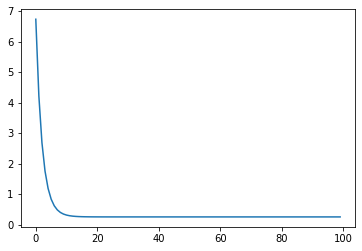

In [6]:
# lossをプロット
plt.plot(losses)

In [8]:
weights_estimated.data

tensor([0.9840, 2.0180, 2.9922])

真値[1,2,3]と比べていい感じに推定できてるよね